# Loading the aircraft shape and placing it into the 3D scene

The plan:

* Use MATLAB to read a geometrical representation of aircraft external surface in STL (StereoLithography) format.<br/>
  STL is a file format commonly used in 3D printing and computer-aided design (CAD) software. It represents the surface geometry of a 3D object using triangular facets. Each facet is defined by its normal vector and three vertices in 3D space. STL files can be used to store and exchange 3D models between various applications.
* Use the provided function `loadAircraftSTL` that returns a triplet of matrices containing infos about shape's vertices, facets, and facets interconnections.
* Save the shape infos in a `.mat` file for later use.
* The geometry is defined in such a way that the aircraft CG is located at the origin $O_\mathrm{E}$ of the Earth frame $\mathcal{F}_\mathrm{E}$, and with body axes aligned with Earth axes ($\psi=\theta=\phi=0$).
* Plot the faceted shape of the aircraft in a 3D space with the function `patch` and display the reference frame $\mathcal{F}_\mathrm{B}$.


## Initialize MATLAB

In [39]:
clearvars; close all; clc

% Make the functions in this work directory available to matlab
current_dir = pwd;
addpath(genpath(current_dir));

% Set all interpreters to latex
list_factory = fieldnames(get(groot,'factory'));
index_interpreter = find(contains(list_factory,'Interpreter'));
for i = 1:length(index_interpreter)
    default_name = strrep(list_factory{index_interpreter(i)},'factory','default');
    set(groot, default_name,'latex');
end

## Load a 3D model with `loadAircraftSTL`

In [40]:
% Use this factor to scale the shape
shapeScaleFactor = 1.0;

% Load shape from .stl file
[V, F, C] = loadAircraftSTL('aircraft_pa24-250.stl', shapeScaleFactor);

% Create shape struct
shape.V = V; shape.F = F; shape.C = C;

% Display shape
fprintf('Displaying aircraft shape struct...\n');
shape

Reading vertex num: 250.
Reading vertex num: 500.
Reading vertex num: 750.
Reading vertex num: 1000.
Reading vertex num: 1250.
Reading vertex num: 1500.
Reading vertex num: 1750.
Reading vertex num: 2000.
Reading vertex num: 2250.
Reading vertex num: 2500.
Reading vertex num: 2750.
Reading vertex num: 3000.
Reading vertex num: 3250.
Reading vertex num: 3500.
Reading vertex num: 3750.
Reading vertex num: 4000.
Reading vertex num: 4250.
Reading vertex num: 4500.
Reading vertex num: 4750.
Reading vertex num: 5000.
Reading vertex num: 5250.
Reading vertex num: 5500.
Reading vertex num: 5750.
Reading vertex num: 6000.
Reading vertex num: 6250.
Reading vertex num: 6500.
Reading vertex num: 6750.
Reading vertex num: 7000.
Reading vertex num: 7250.
Reading vertex num: 7500.
Reading vertex num: 7750.
Reading vertex num: 8000.
Reading vertex num: 8250.
Reading vertex num: 8500.
Reading vertex num: 8750.
Reading vertex num: 9000.
Reading vertex num: 9250.
Reading vertex num: 9500.
Reading vertex 

shape = struct with fields:
    V: [12495x3 double]
    F: [4165x3 double]
    C: [12495x1 double]

## Save a variable `shape` as a MATLAB `struct` in a `.mat` file

In [41]:
save('aircraft_pa24-250.mat', 'shape');

## Display the body axes

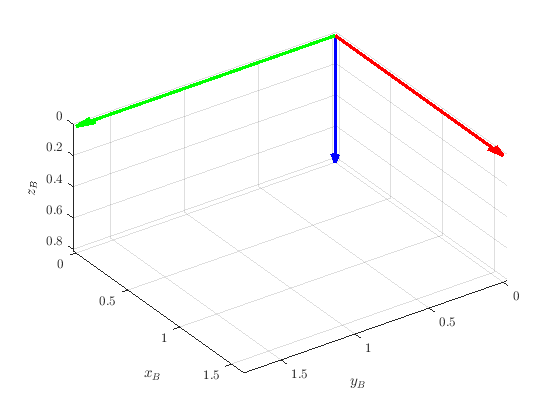

In [42]:
%% Setup the figure/scene
figure(1);

hold on;

% Trick to have Ze pointing downward and correct visualization
set(gca,'XDir','reverse');
set(gca,'ZDir','reverse');

light('Position',[1 0 -2],'Style','local');
theView = [-125 30];
view(theView);

% Axis ranges
xMax = 1.8*max(abs(shape.V(:,1)));
yMax = 1.8*max(abs(shape.V(:,2)));
zMax = 0.5*xMax;

% XB-axis
quiver3( 0,0,0, xMax,0,0, ...
    'r','linewidth',2.5 ...
); hold on;

% YB-axis
quiver3( 0,0,0, 0,yMax,0, ...
    'g','linewidth',2.5 ...
); hold on;

% ZB-axis
quiver3( 0,0,0, 0,0,zMax, ...
    'b','linewidth',2.5 ...
);

xlabel('$x_B$'); ylabel('$y_B$'); zlabel('$z_B$');
grid on; 
axis equal;
hold off

## Display the body axes and the aircraft external shape

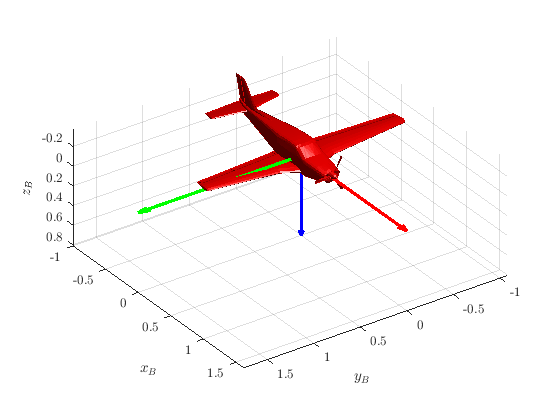

In [43]:
figure(2);

hold on;

% Trick to have Ze pointing downward and correct visualization
set(gca,'XDir','reverse');
set(gca,'ZDir','reverse');

light('Position',[1 0 -2],'Style','local');
theView = [-125 30];
view(theView);

p = patch('faces', shape.F, 'vertices' ,shape.V);
set(p, 'facec', [1 0 0]);          
set(p, 'EdgeColor','none');
lighting phong;
axis equal;
grid on; 

% Axis ranges
xMax = 1.8*max(abs(shape.V(:,1)));
yMax = 1.8*max(abs(shape.V(:,2)));
zMax = 0.5*xMax;

% XB-axis
quiver3( 0,0,0, xMax,0,0, 'r','linewidth',2.5)
% YB-axis
quiver3( 0,0,0, 0,yMax,0, 'g','linewidth',2.5)
% ZB-axis
quiver3( 0,0,0, 0,0,zMax, 'b','linewidth',2.5)

xlabel('$x_B$'); ylabel('$y_B$'); zlabel('$z_B$');

hold off